In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.regression.linear_model import OLS # Ordinary Linear Regression
from statsmodels.tools import add_constant # add a constant (bias) term to linear regression
from itertools import combinations # create combinations of inputs# Seaborn visualization library
import seaborn as sns # Seaborn library for nice plots
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-v0_8')
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

## Data: SAT Scores by State

Load the data, and check the head. Our data is a the SAT scores by U.S. state along with variables for each state that might impact the average SAT score.

In [3]:
df = pd.read_csv('./Guber1999data.csv')
df.head()

,State,Spend,StuTeaRat,Salary,PrcntTake,SATV,SATM,SATT
0,Alabama,4.405,17.2,31.144,8,491,538,1029
1,Alaska,8.963,17.6,47.951,47,445,489,934
2,Arizona,4.778,19.3,32.175,27,448,496,944
3,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,California,4.992,24.0,41.078,45,417,485,902


## Model 1: Ordinary Linear Regreesion (OLS)

We start our analysis with a linear regression model has Total SAT score as a function of spending.

In [4]:
X = df[["Spend"]]
y = df["SATT"]
regr1 = OLS(y, add_constant(X)).fit()
regr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SATT   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     8.128
Date:                Thu, 16 Mar 2023   Prob (F-statistic):            0.00641
Time:                        14:20:57   Log-Likelihood:                -282.29
No. Observations:                  50   AIC:                             568.6
Df Residuals:                      48   BIC:                             572.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1089.2937     44.390     24.539      0.000    1000.042    1178.546
Spend        -20.8922      7.328     -2.851      0.006     -35.627      -6.158
==============================================================================
Omnibus:                        1.634   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.138
Skew:                           0.022   Prob(JB):                        0.566
Kurtosis:                       2.262   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that we get something very suprising here. The coefficient for spending is -20.8922, with a p-score of 0.006. **This means that the variable is significant, and that higher spending corresponds to lower SAT scores, on average.** While we certainly won't make the improper conclusion that spending causes a decrease in SAT scores, this is still counter-intuitive.

Let's use the seaborn library and a pairplot to look at the data:

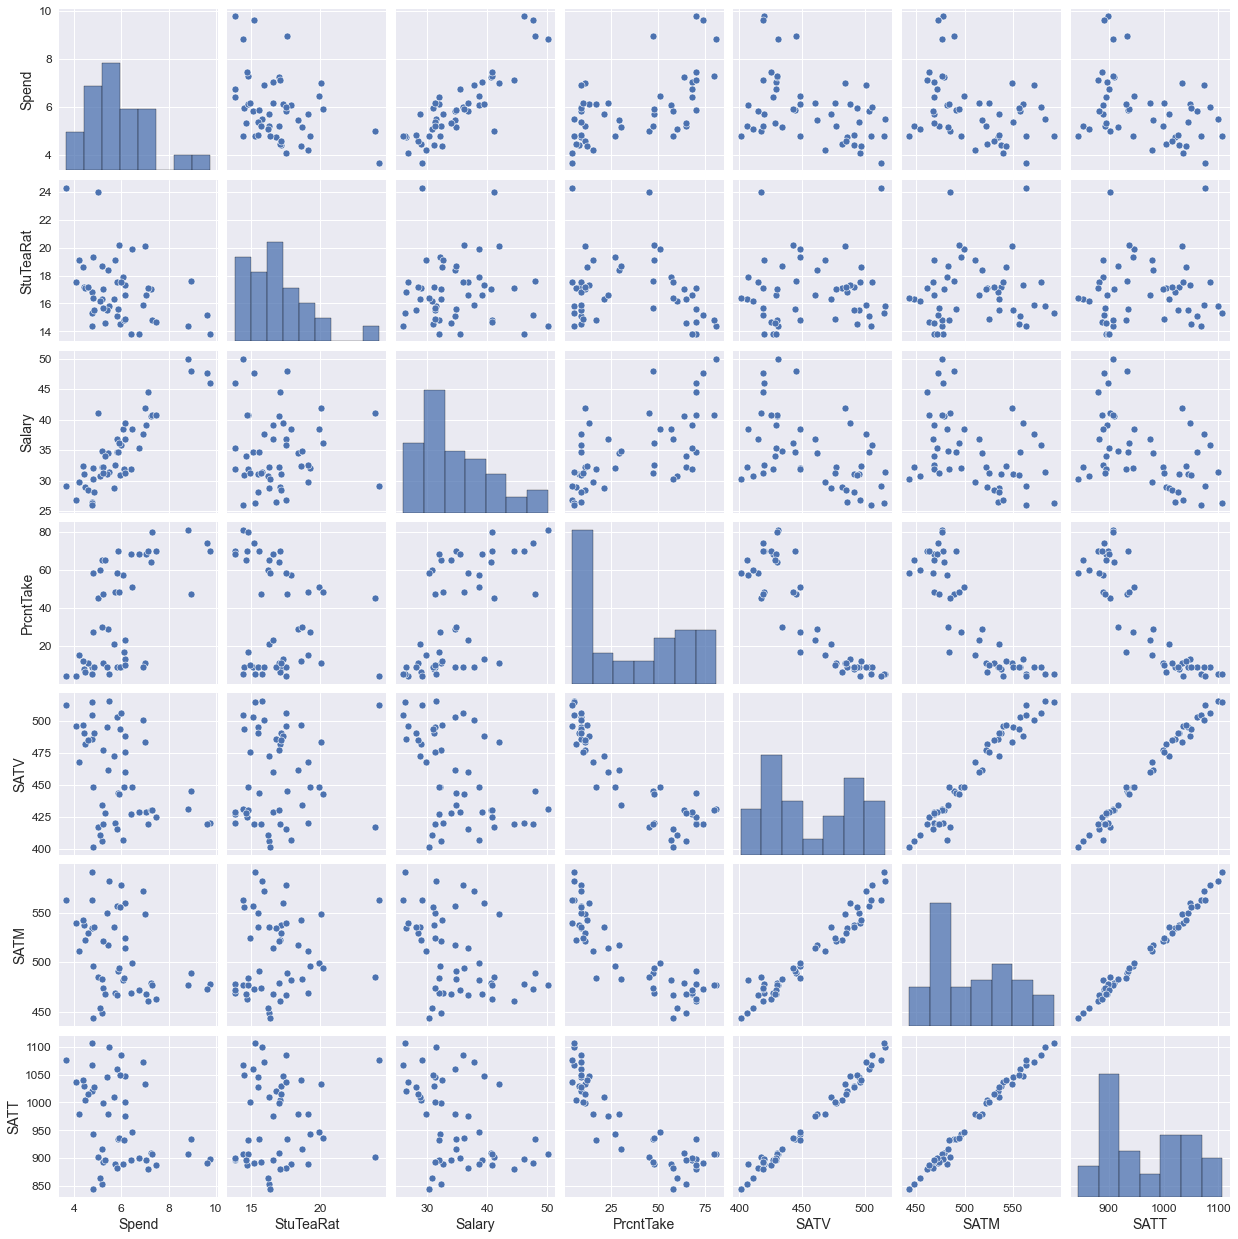

In [100]:
# Create the default pairplot
sns.pairplot(df);

# Bayesian Information Criterion and Bayes Factors

We want to use the Bayesian Information Criterion to analyze models.  There are different information criterion that can be computed and used to estiamte liklihoods.  The different ICs use different approximations (using different simplifying assumptions and Taylor Series approximations). Assuming that the errors are normaly distributed, the formula for **Bayesian Information Criterion (BIC)** is:
\begin{equation}
    \text{BIC} = n\ln(\hat{\sigma^2_e}) + k \ln(n)
\end{equation}
where $n$ is the number of observations (data values), $k$ is the number of predictor variables in the regression model, and $\hat{\sigma^2_e}$ is the error variance, or Mean Squared Error (MSE),
\begin{equation}
    \hat{\sigma^2_e} = \text{MSE} = \frac{1}{n}\sum_{i=1}^n {(y_i-\hat{y_i})}^2.
\end{equation}
Note that the BIC formula has two terms.  The frist term, $n\ln(\hat{\sigma^2_e})$, measures the goodness-of-fit, since lower MSE gives a lower valuer for the first term.  The second term, $k \ln(n)$, is a penalty on the number of input varialbes in the model, and increases as the number of input valirables increases.

We also want to consider the likelihood of this model, and the likelihood is given by
\begin{equation}
    p(x|M)=e^{-\text{BIC}/2}.
\end{equation}
which, sometimes for ease of computation is combined with the above formulas to get a formula for likelihood in terms of MSE,
\begin{equation}
    p(x|M)=\text{MSE}^{-n/2}n^{-k/2}.
\end{equation}
Sometimes it is more intuitive to write the formula as
\begin{equation}
    p(x|M)=\frac{1}{\text{MSE}^{n/2}}\frac{1}{n^{k/2}}.
\end{equation}

If we have two models $M_1$ and $M_2$ with prior probabilities $p(M_1)$ and $p(M_2)$, the **Bayes Factor** is the ratio
\begin{equation}
   {BF}_{12} =\frac{p(x|M_1)p(M_1)}{p(x|M_2)p(M_2)},
\end{equation}
which is just the likelihood ratio if we have equal (uninformative) priors.

In [101]:
# Verify the third equation above is true in our outputs
likelihood1 = np.exp(-regr1.bic/2) # this is the thrid equation
print(np.log(likelihood1)) # the log of the likelihood from BIC
print(regr1.llf)# the log-likelihood from the OLS regression model

-286.19777254908695
-282.2857495436588


Now we create a model that considerd both the Spending and PrcntTake (percentage of students who take the exam) variables, and record the likelihood.

In [102]:
X = df[["Spend", "PrcntTake"]]
y = df["SATT"]
regr2 = OLS(y, add_constant(X)).fit()
likelihood2 = np.exp(-regr2.bic/2)
regr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SATT   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     106.7
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.38e-18
Time:                        12:18:53   Log-Likelihood:                -243.40
No. Observations:                  50   AIC:                             492.8
Df Residuals:                      47   BIC:                             498.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        993.8317     21.833     45.519      0.000     949.909    1037.754
Spend         12.2865      4.224      2.909      0.006       3.788      20.785
PrcntTake     -2.8509      0.215    -13.253      0.000      -3.284      -2.418
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.090
Skew:                          -0.012   Prob(JB):                        0.956
Kurtosis:                       3.207   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Examining the summary, we see that this model has a higher F-statistic (106.7 in comparison to the 8.128 for the previous model) and a lower BIC (498.5 in comparison to 572.4 for the previous model). Both of these suggest that this 2-element model is better than the previous 1-element model. (Recall that the F-statistic is useful for comparing two models onlt when the models are nested - one model is a subset of the other - which is the case here.)

This second model has a coefficient of 12.2865 for the spend variable, and still a p-score of 0.006, now suggesting that, for the same percent of students taking the exam, higher spending corresponds to higher SAT scores.

The PrcntTake variable has a coefficient of -2.8509, so it appears that the PrcntTake variable is explaining the drop in SAT scores. Schools in states that have higher spending also have higher percentages of students taking the exam, and thus are less 'selective' about which students take the exam.

We can use the Bayes' Factor to compare the likelihoods of these two models.

In [103]:
# Compare the likelihoods in our two different models
# Higher Likelihhod => a better model
print(likelihood2/likelihood1)
print(likelihood1)
print(likelihood2)

1.0927500964394878e+16
5.080268300063006e-125
5.551463674832323e-109


This Bayes factor is extremely large, suggesting that the 2-element model is much more likely than the 1-element model, so we should trust its conclusions more strongly.  But while giving one answer, this raises new questions:  
* Do we just take the value of 12.2865 for the coefficent of the spend variable, or should it be something else?
* How does the coefficient for Spend change as we add or remove other variables?  
* Among all the other possible models, what else might they tell us?

​
We will use Bayesian Model Averaging (BMA) to address these questions, but first we check the full model for comparison.

In [104]:
X = df[["Spend", "StuTeaRat", "Salary", "PrcntTake"]]
y = df["SATT"]
regr3 = OLS(y, add_constant(X))
regr3 = regr3.fit()
bic3 = regr3.bic
likelihood3 = np.exp(-bic3/2)
regr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SATT   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     52.88
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.92e-16
Time:                        12:18:53   Log-Likelihood:                -242.68
No. Observations:                  50   AIC:                             495.4
Df Residuals:                      45   BIC:                             504.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1045.9715     52.870     19.784      0.000     939.486    1152.457
Spend          4.4626     10.547      0.423      0.674     -16.779      25.704
StuTeaRat     -3.6242      3.215     -1.127      0.266     -10.100       2.852
Salary         1.6379      2.387      0.686      0.496      -3.170       6.446
PrcntTake     -2.9045      0.231    -12.559      0.000      -3.370      -2.439
==============================================================================
Omnibus:                        1.325   Durbin-Watson:                   2.452
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.572
Skew:                          -0.014   Prob(JB):                        0.751
Kurtosis:                       3.523   Cond. No.                         654.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
print(likelihood2/likelihood3)

24.460238349042214


## Compute Probabilities with Bayes Theorem

In [106]:
# This is a simple Bayesian Model Averaging using our three models
print(likelihood1) # (Spend)
print(likelihood2) # (Spend + Precent_Take)
print(likelihood3) # Full (all 4)

print('probabilities:')
denominator = likelihood1+likelihood2+likelihood3
print(likelihood1/denominator)
print(likelihood2/denominator)
print(likelihood3/denominator)

print('probability for Percent Take:')
print((likelihood2 + likelihood3)/denominator)


print('averaged coeff for Spending:')
print((-20.8922*likelihood1 + 12.2865*likelihood2 + 4.4626*likelihood3)/denominator)

5.080268300063006e-125
5.551463674832323e-109
2.26958690901297e-110
probabilities:
8.791791216559888e-17
0.9607230699771659
0.03927693002283377
probability for Percent Take:
0.9999999999999999
averaged coeff for Spending:
11.979201227194345


Observe that the coefficient for Spend is now around 4.5, significantly less than the 12.3 we saw in the 2-element model.  Which value is correct?  (And really what does 'correct' mean....?)

The F-statistic and BIC score are between the values for the first two models we looked at, suggesting this model is somewhere between the previous two in terms of being 'correct'.  Again, this raises more questions:
* How do we interpret this new model in light of the previous two?
* Is this new model good enough that we should somehow consider the values of the coefficients as well?
* and what about the $2^4=16$ total number of models that could be made?  Should we look at each individualy?

Fortunately, this is exactly what Baeysian Model Averaging is designed to handle!

# Bayesian Model Averaging
Here we define the class that will perform our BMA analysis.

For any model $M_i$ (each model is defined by the set of predictor varialbes being used in the model), Bayes theorem tells us that the probability for $M_i$ is
\begin{equation}
p(M_i|X,y)=\frac{p(X,y|M_i)p(M_i)}{p(X,y)}.
\end{equation}

Using our previous formulas, this becomes,
\begin{equation}
p(M_i|X,y)=\frac{e^{−\text{BIC}_i/2}p(M_i)}{\sum_k e^{−\text{BIC}_k/2}p(M_k)}.
\end{equation}

So far, we have just done Bayesian analysis to compute a posterior probability distribution on the parameters.  But now we can do more with the 'averaging' part of BMA.

The probability for any predictor variable is the sum of the probabilities for all models contiaining that predictor variable, and the expected value for the coefficient of the predictor variable is the average value of the coefficient over all models containing the variable, weighted by the probability of each model.  That is,
\begin{equation}
p(X_k) = \sum_{M_i \text{such that } X_k\in M_i} p(M_i|X,y),
\end{equation}
and
\begin{equation}
E[\beta_k] = \sum_{M_i \text{such that } X_k\in M_i} p(M_i|X,y)\times \beta_k^{(i)},
\end{equation}
where $\beta_k^{(i)}$ is the coefficient of $X_k$ in model $M_i$.

Here is code for a BMA class that will do the Bayeisan Model Averaging.  An excessively commented version of this code is provided at the end of the notebook, which includes commenting for the model averaging steps and code functionality.

In [107]:
class BMA:
    
    def __init__(self, y, X, **kwargs):
        # Setup the basic variables.
        self.y = y
        self.X = X
        self.names = list(X.columns)
        self.nRows, self.nCols = np.shape(X)
        self.likelihoods = np.zeros(self.nCols)
        self.coefficients = np.zeros(self.nCols)
        self.probabilities = np.zeros(self.nCols)
        self.names = list(X.columns)
        # Check the max model size. (Max number of predictor variables to use in a model.)
        # This can be used to reduce the runtime but not doing an exhaustive sampling.
        if 'MaxVars' in kwargs.keys():
            self.MaxVars = kwargs['MaxVars']
        else:
            self.MaxVars = self.nCols  
        # Prepare the priors if they are provided.
        # The priors are provided for the individual regressor variables.
        # The prior for a model is the product of the priors on the variables in the model.
        if 'Priors' in kwargs.keys():
            if np.size(kwargs['Priors']) == self.nCols:
                self.Priors = kwargs['Priors']
            else:
                print("WARNING: Provided priors error.  Using equal priors instead.")
                print("The priors should be a numpy array of length equal tot he number of regressor variables.")
                self.Priors = np.ones(self.nCols)  
        else:
            self.Priors = np.ones(self.nCols)  
        
    def fit(self):
        # Perform the Bayesian Model Averaging
        
        # Initialize the sum of the likelihoods for all the models to zero.  
        # This will be the 'normalization' denominator in Bayes Theorem.
        likelighood_sum = 0
        
        # To facilitate iterating through all possible models, we start by iterating thorugh
        # the number of elements in the model.  
        for num_elements in range(1,self.MaxVars+1): 
            
            # Make a list of all index sets of models of this size.
            model_index_sets = list(combinations(list(range(self.nCols)), num_elements)) 
            
            # Iterate through all possible models of the given size.
            for model_index_set in model_index_sets:
                
                # Compute the linear regression for this given model. 
                model_X = self.X.iloc[:,list(model_index_set)]
                model_regr = OLS(self.y, model_X).fit()
                
                # Compute the likelihood (times the prior) for the model. 
                model_likelihood = np.exp(-model_regr.bic/2)*np.prod(self.Priors[list(model_index_set)])
                print("Model Variables:",model_index_set,"likelihood=",model_likelihood)
                # Add this likelihood to the running tally of likelihoods.
                likelighood_sum = likelighood_sum + model_likelihood
                
                # Add this likelihood (times the priors) to the runny tally
                # of likelihoods for each variable in the model.
                for idx, i in zip(model_index_set, range(num_elements)):
                    self.likelihoods[idx] = self.likelihoods[idx] + model_likelihood
                    self.coefficients[idx] = self.coefficients[idx] + model_regr.params[i]*model_likelihood

        # Divide by the denominator in Bayes theorem to normalize the probabilities 
        # sum to one.
        self.probabilities = self.likelihoods/likelighood_sum
        self.coefficients = self.coefficients/likelighood_sum
        
        # Return the new BMA object as an output.
        return self
        
    def summary(self):
        # Return the BMA results as a data frame for easy viewing.
        df = pd.DataFrame([self.names, list(self.probabilities), list(self.coefficients)], 
             ["Variable Name", "Probability", "Avg. Coefficient"]).T
        return df  

In [108]:
# First, we create our instance of the BMA class
X = df[["Spend", "StuTeaRat", "Salary", "PrcntTake"]]
y = df["SATT"]
result = BMA(y,add_constant(X))

In [109]:
# Call the fit method 
# This fits our model, creating probabilites, coefficients, etc.
result.fit()

Model Variables: (0,) likelihood= 7.193780355030914e-126
Model Variables: (1,) likelihood= 1.8226074496883656e-152
Model Variables: (2,) likelihood= 5.05015486940949e-140
Model Variables: (3,) likelihood= 7.010218767972062e-148
Model Variables: (4,) likelihood= 1.7304354020758625e-172
Model Variables: (0, 1) likelihood= 5.080268300063006e-125
Model Variables: (0, 2) likelihood= 1.2005828833004943e-126
Model Variables: (0, 3) likelihood= 2.1995190705054563e-124
Model Variables: (0, 4) likelihood= 6.265265145128523e-110
Model Variables: (1, 2) likelihood= 3.8677918057908754e-138
Model Variables: (1, 3) likelihood= 4.2237067809376575e-148
Model Variables: (1, 4) likelihood= 1.7501300454458105e-149
Model Variables: (2, 3) likelihood= 1.7325763999151098e-139
Model Variables: (2, 4) likelihood= 1.00745107416556e-140
Model Variables: (3, 4) likelihood= 3.2334000435767602e-142
Model Variables: (0, 1, 2) likelihood= 8.117406632157015e-126
Model Variables: (0, 1, 3) likelihood= 3.112294259330564

In [110]:
result.summary()

,Variable Name,Probability,Avg. Coefficient
0,const,1.0,1015.358718
1,Spend,0.701118,8.388865
2,StuTeaRat,0.296262,-1.032458
3,Salary,0.300254,0.513476
4,PrcntTake,1.0,-2.822242


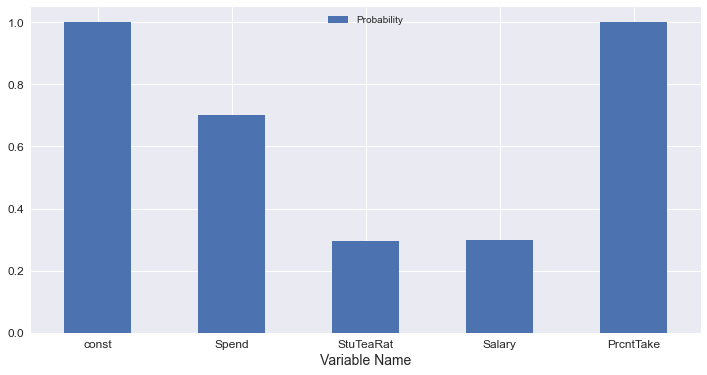

In [116]:
# Create a bar plot with the probaiblities
result.summary().plot.bar(x='Variable Name', y='Probability', rot=0);

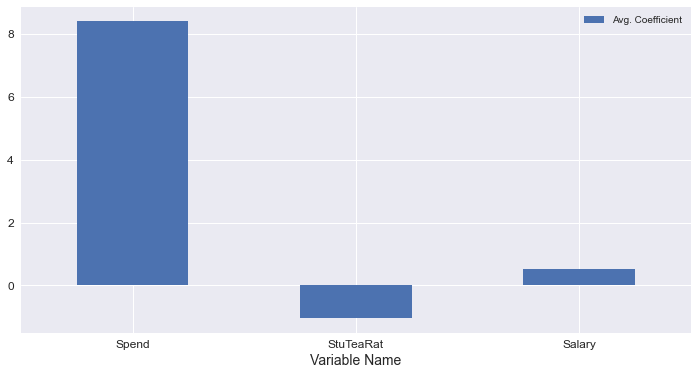

In [115]:
# Create a bar plot, just using the inputs other than constant (beacues the )
result.summary().iloc[1:4].plot.bar(x='Variable Name', y='Avg. Coefficient', rot=0);

Now we can consider the full BMA analysis from the regression model.

First, we observe that the probability for the PrcntTake variable is 1.  This means that the models that did not include this where so unlikely that we probably shouldn't even consider them.

Second, pertaining to the origonal question of the relationship between spending and SAT scores, we see that, all other things being equal, increase in spending corresponds to an increase in SAT scores, and the expected value for the coefficient, after considering all possible models, is 8.47046.  This is not as high as what we saw in the model that considered just spending and percent of students taking the exam (about 12), buch much higher (and more reasonable) than the model that considered just spending alone (which had a coefficient of -2.85).  

Of course, there may be some direct or indirect relationships between spending and student-to-teacher ratio and teacher salary that should also be considered.  Taken as a whole, this single BMA output gives a much more complete picture than any individual models, or even consideration of two models.

Last, we should always consider that there are some other underlying variables that are not included in the analysis.  That is, what other data could have been collected about each state that might also be affecting the outcome SAT scores, and how would these variables affect the analysis.  From a model averaging perspective, we are considering whether our set of predictor varailbes is 'complete'.  The analysis only considers variables we put into it, and the results are only valid for these variables.

In [117]:
result.likelihoods

array([1.11475397e-108, 7.81574270e-109, 3.30259264e-109, 3.34709462e-109,
       1.11475397e-108])

# Excesively Commented Code

In [114]:
# This is an excessively commented version of the code for Bayeisan Model Averaging.

class BMA:
    # After the class definition, we have a sequence of 'methods' associated with the class, 
    # which are just functions that are connected to the class and get internal access 
    # to the internal variables of the class.  The 'self' variable within the class always 
    # refers to class itself.  Varialbes with names of the form self.varname will be 
    # accesible in the methods within the class, and accesible outside the class as 
    # classname.varname.
    
    def __init__(self, y, X, **kwargs):
        # This __init__ function is the initilization method and runs when the class 
        # is created. Here we just use it to attached the X and y variables to the class, 
        # compute basic shape variables and attach them, and build some placeholder 
        # variables for our BMA analysis.  The variable names are self-explanatory.
        self.y = y
        self.X = X
        self.names = list(X.columns)
        self.nRows, self.nCols = np.shape(X)
        self.likelihoods = np.zeros(self.nCols)
        self.coefficients = np.zeros(self.nCols)
        self.probabilities = np.zeros(self.nCols)
        self.names = list(X.columns)
        # Check the max model size. (Max number of predictor variables to use in a model.)
        # This can be used to reduce the runtime but not doing an exhaustive sampling.
        if 'MaxVars' in kwargs.keys():
            self.MaxVars = kwargs['MaxVars']
        else:
            self.MaxVars = self.nCols  
        # Prepare the priors if they are provided.
        # The priors are provided for the individual regressor variables.
        # The prior for a model is the product of the priors on the variables in the model.
        if 'Priors' in kwargs.keys():
            if np.size(kwargs['Priors']) == self.nCols:
                self.Priors = kwargs['Priors']
            else:
                print("WARNING: Provided priors error.  Using equal priors instead.")
                print("The priors should be a numpy array of length equal tot he number of regressor variables.")
                self.Priors = np.ones(self.nCols)  
        else:
            self.Priors = np.ones(self.nCols)  
        
    def fit(self):
        # In this fit method, we are doing our model averaging.  This is a Baeysian 
        # process, where in general we consider different values of the parameters and 
        # use Bayes Theorem to compute a probability for each set of parameter values, 
        # resulting in a probability distribution for the parameters.
        
        # The parameters we want to estimate is whether or not to include each available 
        # predictor variable.  This means we want to assign a probability to the options 
        # {include, do not include} for each variable. This gives the probability of 
        # including the variable in the model.
        
        # From a Bayesian Statistics sampleing perspective, we are going to compute all 
        # possible parameter combinations as the default.  This is only feasible for 
        # problems with only a few predictor variables.  The keyward MaxVars can be used 
        # to reduce the number of models.
        
        # We initialize the sum of the likelihoods for all the models to zero.  
        # This will be the denominatory in Bayes Theorem, and we will apply it to 
        # normalize in the end.
        likelighood_sum = 0
        
        # To facilitate iterating through all possible models, we start by iterating thorugh
        # the number of elements in the model.  The number of elements is the number of 
        # predictor variables.
        for num_elements in range(1,self.MaxVars+1): 
            
            # Make a list of all index sets of models of this size.
            # For example, if there are 4 predictor variables, this will output the list
            # [(0,1), (0,2), (0,3), (1,2), (1,2), (2,3)].
            model_index_sets = list(combinations(list(range(self.nCols)), num_elements)) 
            # We now iterate through all possible models of the given size.
            for model_index_set in model_index_sets:
                
                # This is where the model averaging happens.
                # First, we compute the linear regression for this given model.  
                # (In other words, we select the set of input variables in model_index_set, 
                # and compute the linear regression model using just these variables.)  
                # We do this using OLS from the statsmodels package.  In our notation, 
                # henceforth any variable beginning with model_ is a variable that is 
                # just for this specific model.
                model_X = self.X.iloc[:,list(model_index_set)]
                model_regr = OLS(self.y, model_X).fit()
                
                # We compute the likelihood for the model from the BIC provided by OLS. 
                # This could alternatively be computed using AIC, the likelihood provided 
                # by OLS, or from RSS using the formula described previously.
                # NOTE:  This is actually the likelihood times the prior.
                model_likelihood = np.exp(-model_regr.bic/2)*np.prod(self.Priors[list(model_index_set)])
                print("Model Variables:",model_index_set,"likelihood=",model_likelihood)
                # Add this likelihood to the running tally of likelihoods for the denominator
                # in Bayes theorem.
                likelighood_sum = likelighood_sum + model_likelihood
                
                # The key step in model averaging for regression is that for each 
                # predictor variable, the probability that the variable should be included 
                # is the sum of all probabilities for all models that include the given 
                # variable.  This is equal to the sum of likelihoodsfor all models 
                # that include the given variable divided by the total likelihood.  
                
                # The other component of model average is that we can compute the 
                # average value of any any varaible over all the models, where this 
                # average is weighted by the probability of each model.  This gives the 
                # expected value for the variable given all the models being considered. 
                # In the following loop we compute the average value for the coefficients
                # for each variable.
                
                # following loop we iterate through all variables in the model 
                # (using their indexes), add the likelihood for the model to the vaiable 
                # tracking the likelihoods for each variable present in the model.  
                # We also add the coefficent for each variable (weighted by 
                # its likelihood) to the variable for the averaged coefficients.
                # [NOTE: idx is the index for the predictor variable within the set of 
                # all predictor variables and i is the index for this same 
                # predictor variable in the current regression model.]
                for idx, i in zip(model_index_set, range(num_elements)):
                    self.likelihoods[idx] = self.likelihoods[idx] + model_likelihood
                    self.coefficients[idx] = self.coefficients[idx] + model_regr.params[i]*model_likelihood

        # Now we divide by the denominator in Bayes theorem to normalize the probabilities to one.
        self.probabilities = self.likelihoods/likelighood_sum
        self.coefficients = self.coefficients/likelighood_sum
        
        # Having updated all the internal varaibles with our Bayeisan Model Averaing, 
        # we return the new BMA object as an output.
        return self
        
    def summary(self):
        # This function just takes the Bayesian Model Averaging analysis and returns
        # it as a data frame which makes it easier to veiw.
        df = pd.DataFrame([self.names, list(self.probabilities), list(self.coefficients)], 
             ["Variable Name", "Probability", "Avg. Coefficient"]).T
        return df        